In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
newData = pd.read_excel('data/2021.xlsx')
#Sheidzleba gamomadges
newData=newData.drop(['division_id','district_id','district_alt_id'],axis=1)
pd.set_option('display.max_columns', 999)
newData

,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,special_voters,total_votes,disbalance_num,is_balanced,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
0,0,proportional,0,0,1338,20,668,12,646,2,0,176.0,23.0,67.0,23.0,232.0,31.0,21.0,1350,49.481481,0.446576
1,0,majoritarian,0,0,1338,31,668,12,629,8,0,NaN,77.0,88.0,NaN,237.0,98.0,37.0,1350,49.481481,0.446576
2,0,mayor,0,0,1338,17,668,12,651,0,1,230.0,12.0,77.0,NaN,269.0,NaN,31.0,1350,49.481481,0.446576
3,0,proportional,0,0,1270,15,639,13,622,2,0,150.0,26.0,59.0,24.0,253.0,34.0,18.0,1283,49.805144,0.424413
4,0,majoritarian,0,0,1270,24,639,13,609,6,0,NaN,83.0,54.0,NaN,282.0,100.0,31.0,1283,49.805144,0.424413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8226,1,mayor,1,0,0,4,54,72,50,0,1,13.0,NaN,0.0,NaN,34.0,NaN,NaN,72,75.000000,0.023817
8227,0,proportional,1,0,0,2,67,68,65,0,1,0.0,0.0,0.0,0.0,61.0,1.0,0.0,68,98.529412,0.022494
8228,0,mayor,1,0,0,2,67,68,65,0,1,1.0,NaN,1.0,NaN,62.0,NaN,NaN,68,98.529412,0.022494
8229,0,proportional,1,0,0,2,33,34,32,-1,0,4.0,0.0,1.0,0.0,27.0,0.0,0.0,34,97.058824,0.011247


In [3]:
def estimate_gaussian(X):
    mean = X.mean(axis=0)
    sigma = X.var(axis=0)
    
    return mean, sigma

In [4]:
X = newData['invalid_ballots']
mean,sigma  = estimate_gaussian(X)
mean,sigma

(19.133276637103634, 177.3301088127698)

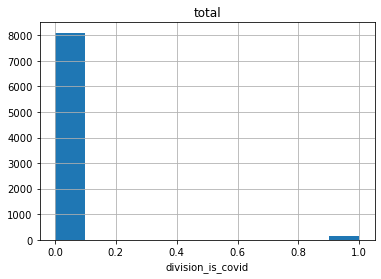

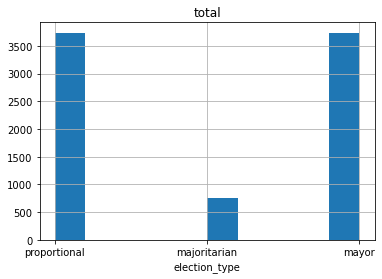

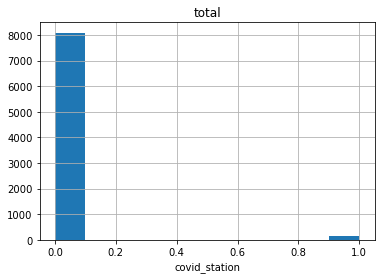

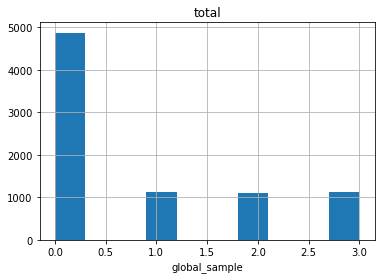

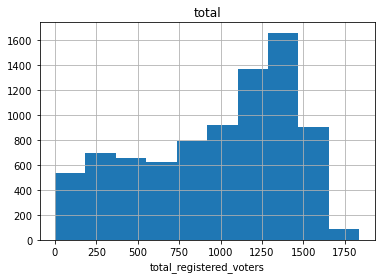

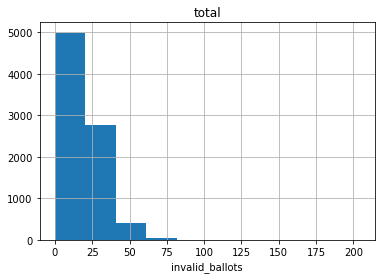

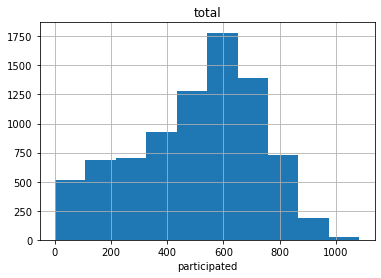

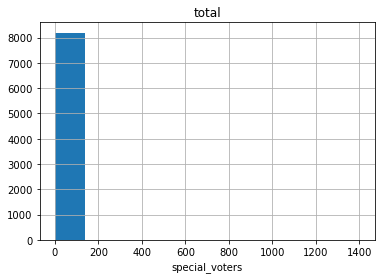

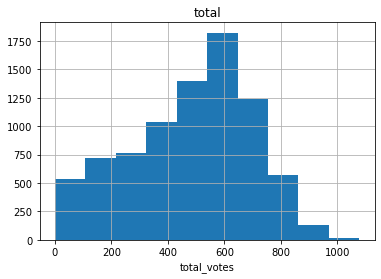

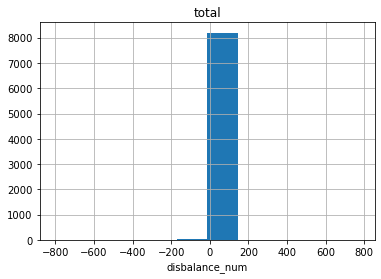

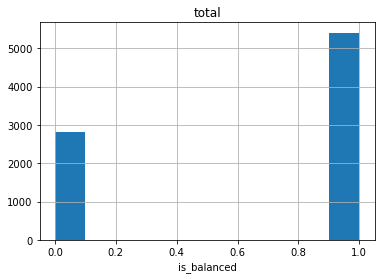

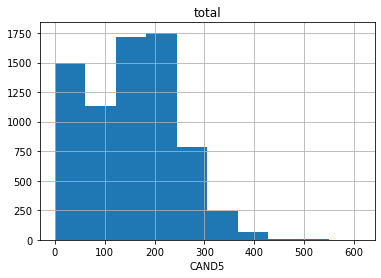

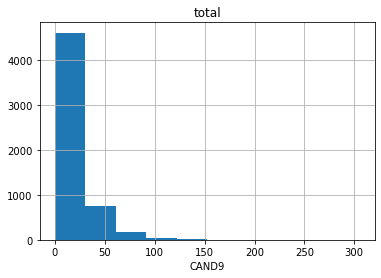

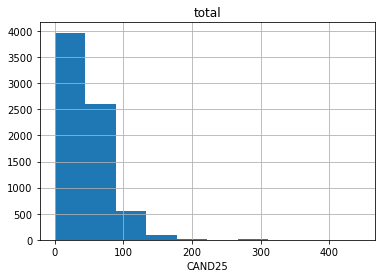

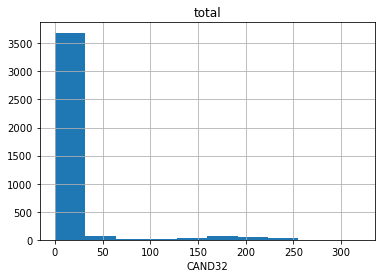

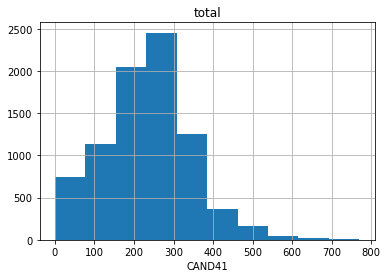

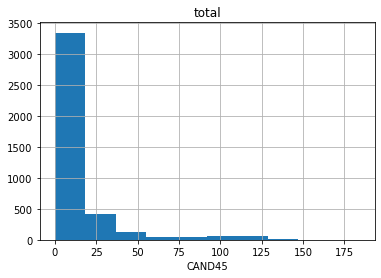

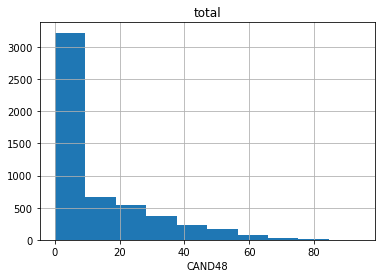

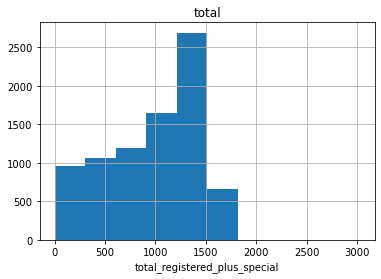

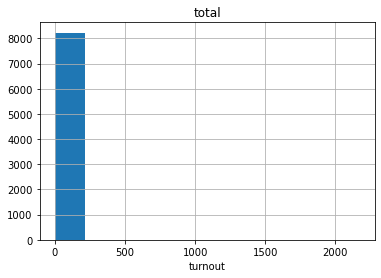

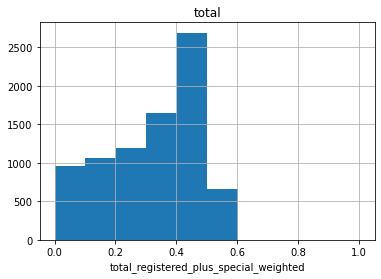

In [5]:
#Displaying the histograms of the columns.
for col in newData.columns:
    newData[col].hist()
    plt.xlabel(col)
    plt.title("total")
    plt.show()

In [6]:
#To convert string type columns in numerical ones.
oneHot=pd.get_dummies(newData)
oneHot

,division_is_covid,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,special_voters,total_votes,disbalance_num,is_balanced,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted,election_type_majoritarian,election_type_mayor,election_type_proportional
0,0,0,0,1338,20,668,12,646,2,0,176.0,23.0,67.0,23.0,232.0,31.0,21.0,1350,49.481481,0.446576,0,0,1
1,0,0,0,1338,31,668,12,629,8,0,NaN,77.0,88.0,NaN,237.0,98.0,37.0,1350,49.481481,0.446576,1,0,0
2,0,0,0,1338,17,668,12,651,0,1,230.0,12.0,77.0,NaN,269.0,NaN,31.0,1350,49.481481,0.446576,0,1,0
3,0,0,0,1270,15,639,13,622,2,0,150.0,26.0,59.0,24.0,253.0,34.0,18.0,1283,49.805144,0.424413,0,0,1
4,0,0,0,1270,24,639,13,609,6,0,NaN,83.0,54.0,NaN,282.0,100.0,31.0,1283,49.805144,0.424413,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8226,1,1,0,0,4,54,72,50,0,1,13.0,NaN,0.0,NaN,34.0,NaN,NaN,72,75.000000,0.023817,0,1,0
8227,0,1,0,0,2,67,68,65,0,1,0.0,0.0,0.0,0.0,61.0,1.0,0.0,68,98.529412,0.022494,0,0,1
8228,0,1,0,0,2,67,68,65,0,1,1.0,NaN,1.0,NaN,62.0,NaN,NaN,68,98.529412,0.022494,0,1,0
8229,0,1,0,0,2,33,34,32,-1,0,4.0,0.0,1.0,0.0,27.0,0.0,0.0,34,97.058824,0.011247,0,0,1


In [7]:
#Function to write uniques in the column and their probability
def writeUniques(column_name):
    print('-'*40)
    print("Variances of the column '" + column_name+ "' is:")
    for val in oneHot[column_name].unique():
        print(val, "\t Chance: ", len(oneHot[oneHot[column_name] == val]) / len(oneHot))

In [8]:
writeUniques('division_is_covid')
writeUniques("covid_station")
writeUniques('global_sample')
writeUniques('is_balanced')

----------------------------------------
Variances of the column 'division_is_covid' is:
0 	 Chance:  0.983234114931357
1 	 Chance:  0.016765885068642936
----------------------------------------
Variances of the column 'covid_station' is:
0 	 Chance:  0.982748147248208
1 	 Chance:  0.017251852751792005
----------------------------------------
Variances of the column 'global_sample' is:
0 	 Chance:  0.5917871461547807
2 	 Chance:  0.13461304823229256
1 	 Chance:  0.13692139472725065
3 	 Chance:  0.13667841088567612
----------------------------------------
Variances of the column 'is_balanced' is:
0 	 Chance:  0.34345766006560563
1 	 Chance:  0.6565423399343944


In [9]:
def replaceNans(column_name):
    oneHot[column_name].fillna(0, inplace = True)

In [10]:
replaceNans('CAND5')
replaceNans('CAND9')
replaceNans('CAND25')
replaceNans('CAND32')
replaceNans('CAND41')
replaceNans('CAND45')
replaceNans('CAND48')
replaceNans('invalid_ballots')

In [11]:
oneHot

,division_is_covid,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,special_voters,total_votes,disbalance_num,is_balanced,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted,election_type_majoritarian,election_type_mayor,election_type_proportional
0,0,0,0,1338,20,668,12,646,2,0,176.0,23.0,67.0,23.0,232.0,31.0,21.0,1350,49.481481,0.446576,0,0,1
1,0,0,0,1338,31,668,12,629,8,0,0.0,77.0,88.0,0.0,237.0,98.0,37.0,1350,49.481481,0.446576,1,0,0
2,0,0,0,1338,17,668,12,651,0,1,230.0,12.0,77.0,0.0,269.0,0.0,31.0,1350,49.481481,0.446576,0,1,0
3,0,0,0,1270,15,639,13,622,2,0,150.0,26.0,59.0,24.0,253.0,34.0,18.0,1283,49.805144,0.424413,0,0,1
4,0,0,0,1270,24,639,13,609,6,0,0.0,83.0,54.0,0.0,282.0,100.0,31.0,1283,49.805144,0.424413,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8226,1,1,0,0,4,54,72,50,0,1,13.0,0.0,0.0,0.0,34.0,0.0,0.0,72,75.000000,0.023817,0,1,0
8227,0,1,0,0,2,67,68,65,0,1,0.0,0.0,0.0,0.0,61.0,1.0,0.0,68,98.529412,0.022494,0,0,1
8228,0,1,0,0,2,67,68,65,0,1,1.0,0.0,1.0,0.0,62.0,0.0,0.0,68,98.529412,0.022494,0,1,0
8229,0,1,0,0,2,33,34,32,-1,0,4.0,0.0,1.0,0.0,27.0,0.0,0.0,34,97.058824,0.011247,0,0,1


# Creating some new columns which may trigger anomalyous behaviour


In [12]:
#Percentage of invalid ballot mustn't be too big for normal rows.
oneHot['inval_bal_percentage'] = pd.DataFrame(oneHot['invalid_ballots'] / oneHot['participated'])
#Disbalance percentage
oneHot['disbal_percentage'] = pd.DataFrame(oneHot['disbalance_num'] / oneHot['participated'])
#invalid ballots and disbalance multiplication this two factor maybe the most vital for anomaly.
oneHot['disbal_plus_ballots'] = pd.DataFrame(oneHot['disbalance_num'] * oneHot['invalid_ballots'])
#Special voters numbers low chance may increase chance of falsery of election.
oneHot['specials_percentage'] = pd.DataFrame(oneHot['special_voters'] / oneHot['participated'])
#Multiply all columns which are the most anomalous columns that trigger forgery.
oneHot['mainFactors'] = pd.DataFrame(oneHot['disbalance_num'] *  (100 - oneHot['turnout']) * oneHot['invalid_ballots'] * oneHot['specials_percentage'])
#Deleteing rows where this numerators may be 0 and give infinity.
oneHot = oneHot[(oneHot['participated'] != 0) & (oneHot['total_votes'] != 0)]
oneHot

,division_is_covid,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,special_voters,total_votes,disbalance_num,is_balanced,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted,election_type_majoritarian,election_type_mayor,election_type_proportional,inval_bal_percentage,disbal_percentage,disbal_plus_ballots,specials_percentage,mainFactors
0,0,0,0,1338,20,668,12,646,2,0,176.0,23.0,67.0,23.0,232.0,31.0,21.0,1350,49.481481,0.446576,0,0,1,0.029940,0.002994,40,0.017964,36.300732
1,0,0,0,1338,31,668,12,629,8,0,0.0,77.0,88.0,0.0,237.0,98.0,37.0,1350,49.481481,0.446576,1,0,0,0.046407,0.011976,248,0.017964,225.064538
2,0,0,0,1338,17,668,12,651,0,1,230.0,12.0,77.0,0.0,269.0,0.0,31.0,1350,49.481481,0.446576,0,1,0,0.025449,0.000000,0,0.017964,0.000000
3,0,0,0,1270,15,639,13,622,2,0,150.0,26.0,59.0,24.0,253.0,34.0,18.0,1283,49.805144,0.424413,0,0,1,0.023474,0.003130,30,0.020344,30.635358
4,0,0,0,1270,24,639,13,609,6,0,0.0,83.0,54.0,0.0,282.0,100.0,31.0,1283,49.805144,0.424413,1,0,0,0.037559,0.009390,144,0.020344,147.049718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8226,1,1,0,0,4,54,72,50,0,1,13.0,0.0,0.0,0.0,34.0,0.0,0.0,72,75.000000,0.023817,0,1,0,0.074074,0.000000,0,1.333333,0.000000
8227,0,1,0,0,2,67,68,65,0,1,0.0,0.0,0.0,0.0,61.0,1.0,0.0,68,98.529412,0.022494,0,0,1,0.029851,0.000000,0,1.014925,0.000000
8228,0,1,0,0,2,67,68,65,0,1,1.0,0.0,1.0,0.0,62.0,0.0,0.0,68,98.529412,0.022494,0,1,0,0.029851,0.000000,0,1.014925,0.000000
8229,0,1,0,0,2,33,34,32,-1,0,4.0,0.0,1.0,0.0,27.0,0.0,0.0,34,97.058824,0.011247,0,0,1,0.060606,-0.030303,-2,1.030303,-6.060606


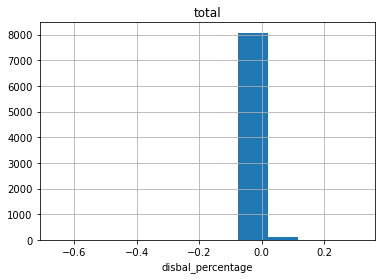

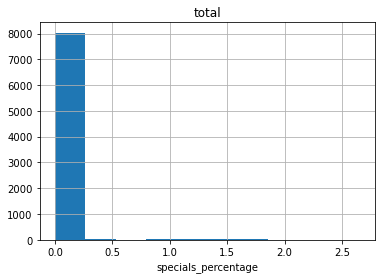

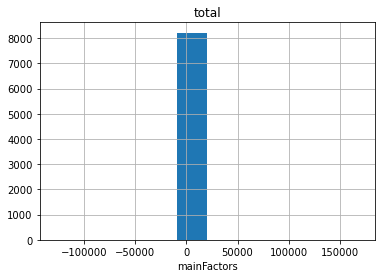

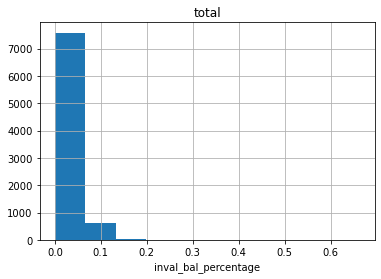

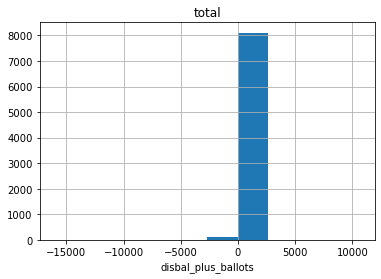

In [13]:
my_addited = {'inval_bal_percentage','disbal_percentage','disbal_plus_ballots','specials_percentage','mainFactors'}
for col in my_addited:
    oneHot[col].hist()
    plt.xlabel(col)
    plt.title("total")
    plt.show()

In [14]:
#Count the means of each column
pd.DataFrame(oneHot.mean())

,0
division_is_covid,0.016770
covid_station,0.017256
global_sample,0.816017
total_registered_voters,969.689270
invalid_ballots,19.131365
participated,502.231377
special_voters,10.715883
total_votes,482.122858
disbalance_num,0.977154
is_balanced,0.656702


In [15]:
#Find standard deviations of the columns
pd.DataFrame(oneHot.std())

,0
division_is_covid,0.128416
covid_station,0.130232
global_sample,1.113374
total_registered_voters,455.366843
invalid_ballots,13.316849
participated,223.676461
special_voters,32.124264
total_votes,215.577992
disbalance_num,6.078202
is_balanced,0.474839


In [33]:
#Count the correlations of some interesting columns in my opinion.
print((oneHot.corr()**2)['total_votes'].sort_values(ascending=False)[:15])
print('*'*50)
print((oneHot.corr()**2)['mainFactors'].sort_values(ascending=False)[:15])
print('*'*50)
print((oneHot.corr()**2)['disbalance_num'].sort_values(ascending=False)[:15])
print('*'*50)
print((oneHot.corr()**2)['disbal_plus_ballots'].sort_values(ascending=False)[:15])

total_votes                               1.000000
participated                              0.996825
total_registered_voters                   0.850153
total_registered_plus_special             0.848268
total_registered_plus_special_weighted    0.848268
CAND41                                    0.696862
CAND5                                     0.359744
CAND25                                    0.336011
invalid_ballots                           0.300003
CAND48                                    0.182211
CAND9                                     0.158636
specials_percentage                       0.089003
CAND45                                    0.087439
is_balanced                               0.085287
covid_station                             0.070675
Name: total_votes, dtype: float64
**************************************************
mainFactors                               1.000000
disbal_percentage                         0.275916
disbalance_num                            0.1891

In [17]:
#Standartization of the whole data
oneHotStd = (oneHot - oneHot.mean()) / oneHot.std()
oneHotStd

,division_is_covid,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,special_voters,total_votes,disbalance_num,is_balanced,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted,election_type_majoritarian,election_type_mayor,election_type_proportional,inval_bal_percentage,disbal_percentage,disbal_plus_ballots,specials_percentage,mainFactors
0,-0.130591,-0.132502,-0.732922,0.808822,0.065228,0.741109,0.039973,0.760176,0.168281,-1.383000,0.415407,0.547055,0.755411,0.603694,-0.014478,1.358238,0.949237,0.810843,-0.135727,0.810843,-0.318275,-0.911819,1.096575,-0.336430,0.074504,0.066768,-0.149082,-0.006299
1,-0.130591,-0.132502,-0.732922,0.808822,0.891249,0.741109,0.039973,0.681318,1.155415,-1.383000,-1.358089,3.408077,1.331790,-0.200564,0.030947,5.045217,2.076171,0.810843,-0.135727,0.810843,3.141551,-0.911819,-0.911819,0.347617,0.602219,0.795727,-0.149082,0.049861
2,-0.130591,-0.132502,-0.732922,0.808822,-0.160050,0.741109,0.039973,0.783369,-0.160764,0.722978,0.959548,-0.035746,1.029877,-0.200564,0.321664,-0.347678,1.653571,0.810843,-0.135727,0.810843,-0.318275,1.096575,-0.911819,-0.522988,-0.101401,-0.073417,-0.149082,-0.017099
3,-0.130591,-0.132502,-0.732922,0.659492,-0.310236,0.611457,0.071103,0.648847,0.168281,-1.383000,0.153413,0.706000,0.535838,0.638662,0.176305,1.523326,0.737937,0.663854,-0.126831,0.663854,-0.318275,-0.911819,1.096575,-0.605026,0.082487,0.031722,-0.137745,-0.007984
4,-0.130591,-0.132502,-0.732922,0.659492,0.365600,0.611457,0.071103,0.588544,0.826370,-1.383000,-1.358089,3.725969,0.398605,-0.200564,0.439768,5.155276,1.653571,0.663854,-0.126831,0.663854,3.141551,-0.911819,-0.911819,-0.019952,0.450264,0.431247,-0.137745,0.026651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8226,7.656586,7.546110,-0.732922,-2.129468,-1.136257,-2.003927,1.907720,-2.004485,-0.160764,0.722978,-1.227093,-0.671529,-1.083513,-0.200564,-1.813292,-0.347678,-0.529864,-1.992923,0.565599,-1.992923,-0.318275,1.096575,-0.911819,1.496907,-0.101401,-0.073417,6.115931,-0.017099
8227,-0.130591,7.546110,-0.732922,-2.129468,-1.286443,-1.945808,1.783204,-1.934905,-0.160764,0.722978,-1.358089,-0.671529,-1.083513,-0.200564,-1.567999,-0.292648,-0.529864,-2.001698,1.212258,-2.001698,-0.318275,-0.911819,1.096575,-0.340142,-0.101401,-0.073417,4.599376,-0.017099
8228,-0.130591,7.546110,-0.732922,-2.129468,-1.286443,-1.945808,1.783204,-1.934905,-0.160764,0.722978,-1.348013,-0.671529,-1.056066,-0.200564,-1.558914,-0.347678,-0.529864,-2.001698,1.212258,-2.001698,-0.318275,1.096575,-0.911819,-0.340142,-0.101401,-0.073417,4.599376,-0.017099
8229,-0.130591,7.546110,-0.732922,-2.129468,-1.286443,-2.097813,0.724814,-2.087981,-0.325286,-1.383000,-1.317783,-0.671529,-1.056066,-0.200564,-1.876887,-0.347678,-0.529864,-2.076290,1.171842,-2.076290,-0.318275,-0.911819,1.096575,0.937442,-1.881774,-0.080426,4.672619,-0.018902


In [18]:
#Data frame which contains information about the probability of coming this result.
oneHotChances = np.exp(- np.square(oneHotStd) / 2) / np.sqrt(2 * np.pi)
#Addition of probabilty column which takes information about the rows probability and initialized by 1 at first.
oneHotChances['probability'] = 1
for col in oneHotChances.columns:
    oneHotChances['probability'] *= oneHotChances[col]

#Take some epsilon value and if the probability of the row coming is less than this value this row must be declared as an anomaly.
epsilon = 1e-323
pd.DataFrame(oneHotChances[oneHotChances['probability'] < epsilon])

,division_is_covid,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,special_voters,total_votes,disbalance_num,is_balanced,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted,election_type_majoritarian,election_type_mayor,election_type_proportional,inval_bal_percentage,disbal_percentage,disbal_plus_ballots,specials_percentage,mainFactors,probability
434,3.955550e-01,3.954555e-01,0.304975,0.208729,1.571554e-02,0.195900,4.076141e-122,0.230419,2.046548e-01,0.153312,0.158636,0.009890,0.135613,3.909985e-01,0.382022,2.120657e-07,0.000331,0.007900,3.411925e-01,0.007900,0.002870,0.263251,0.263251,1.752102e-01,3.503265e-01,1.471105e-01,1.406767e-05,4.399475e-16,0.0
1235,3.955550e-01,3.954555e-01,0.304975,0.301244,1.755710e-03,0.134561,9.622168e-29,0.261793,1.150063e-46,0.153312,0.158636,0.223405,0.388175,3.909985e-01,0.208472,3.755444e-01,0.127063,0.121204,3.951727e-01,0.121204,0.002870,0.263251,0.263251,1.171778e-01,1.987951e-09,2.386674e-84,6.553349e-02,9.929824e-312,0.0
1328,3.955550e-01,3.954555e-01,0.304975,0.346277,2.276759e-02,0.131915,1.800633e-38,0.290320,5.704583e-99,0.153312,0.158636,0.286912,0.241383,3.909985e-01,0.199885,3.755444e-01,0.090262,0.138252,3.969627e-01,0.138252,0.002870,0.263251,0.263251,2.523594e-01,6.808385e-19,1.272164e-117,3.322863e-02,0.000000e+00,0.0
1329,3.955550e-01,3.954555e-01,0.304975,0.346277,3.950340e-01,0.131915,1.800633e-38,0.251731,1.558831e-91,0.153312,0.268714,0.386892,0.335069,3.909985e-01,0.197754,3.755444e-01,0.303852,0.138252,3.969627e-01,0.138252,0.379239,0.218673,0.263251,3.456673e-01,1.542581e-17,3.275649e-19,3.322863e-02,7.992791e-87,0.0
1598,3.955550e-01,3.954555e-01,0.304975,0.324204,3.195961e-01,0.260226,3.989267e-01,0.120241,8.401269e-110,0.153312,0.158636,0.392799,0.306081,3.909985e-01,0.339711,3.119653e-10,0.001879,0.324206,3.987139e-01,0.324206,0.002870,0.263251,0.263251,3.982160e-01,8.519590e-29,1.172776e-39,3.938211e-01,2.917974e-01,0.0
1937,3.955550e-01,3.954555e-01,0.304975,0.142544,3.224846e-02,0.151022,0.000000e+00,0.170722,3.933334e-01,0.153312,0.158636,0.353104,0.214928,4.826435e-11,0.228062,3.755444e-01,0.220226,0.000017,2.998719e-01,0.000017,0.002870,0.263251,0.263251,2.611827e-01,3.985744e-01,3.846590e-01,7.112699e-15,5.156199e-04,0.0
2622,3.955550e-01,3.954555e-01,0.304975,0.065039,5.657324e-43,0.267733,3.875991e-01,0.393381,1.992657e-16,0.153312,0.158636,0.318410,0.221809,3.909985e-01,0.325138,3.755444e-01,0.346693,0.067398,3.609979e-01,0.067398,0.379239,0.218673,0.263251,5.008615e-25,4.759276e-05,4.579487e-300,3.898869e-01,2.857220e-01,0.0
2716,3.955550e-01,3.954555e-01,0.304975,0.386991,2.006239e-25,0.350536,3.845255e-01,0.376191,4.678260e-61,0.153312,0.142858,0.318410,0.280873,3.909985e-01,0.376340,3.755444e-01,0.346693,0.388771,3.980707e-01,0.388771,0.379239,0.218673,0.263251,1.525714e-19,2.662039e-21,0.000000e+00,3.894739e-01,3.156530e-01,0.0
5511,3.955550e-01,3.954555e-01,0.304975,0.395415,3.310920e-01,0.380806,3.962823e-01,0.264860,2.782331e-108,0.153312,0.176416,0.318410,0.398594,3.909985e-01,0.398623,3.755444e-01,0.346693,0.394980,3.915443e-01,0.394980,0.379239,0.218673,0.263251,3.471654e-01,6.386552e-74,6.280083e-07,3.940047e-01,3.738233e-01,0.0
7044,3.955550e-01,3.954555e-01,0.226645,0.364226,1.462057e-01,0.270935,3.937898e-18,0.354419,1.816705e-32,0.153312,0.287742,0.349830,0.241687,3.909985e-01,0.236841,3.923473e-01,0.346693,0.229888,3.926070e-01,0.229888,0.379239,0.263251,0.218673,3.169976e-01,2.964353e-09,6.676276e-22,8.249043e-02,1.925087e-74,0.0


In [19]:
#Disbalance column is the best column to define anomaly in the election and here I will represent such values.
#From this two columns we can conclude that some of the same rows have very low probability of coming.
epsilon = 1e-60
pd.DataFrame(oneHotChances[oneHotChances['disbalance_num'] < epsilon])

,division_is_covid,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,special_voters,total_votes,disbalance_num,is_balanced,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted,election_type_majoritarian,election_type_mayor,election_type_proportional,inval_bal_percentage,disbal_percentage,disbal_plus_ballots,specials_percentage,mainFactors,probability
404,0.395555,0.395456,0.226645,0.241469,3.031504e-01,0.149146,3.968630e-01,0.271783,6.887308e-79,0.153312,0.158636,0.391453,0.201894,0.390999,0.384008,1.579230e-12,0.003670,0.239965,0.398183,0.239965,0.002870,0.263251,0.263251,3.967972e-01,6.592107e-16,6.219784e-31,0.394304,3.062982e-01,1.856605e-305
605,0.395555,0.395456,0.393532,0.186119,1.462057e-01,0.162514,3.988432e-01,0.083085,4.678260e-61,0.153312,0.158636,0.000569,0.195456,0.390999,0.317458,6.324344e-10,0.020914,0.186760,0.398068,0.186760,0.002870,0.263251,0.263251,3.700022e-01,4.193648e-13,4.598886e-40,0.392862,3.136505e-01,2.072091e-283
1328,0.395555,0.395456,0.304975,0.346277,2.276759e-02,0.131915,1.800633e-38,0.290320,5.704583e-99,0.153312,0.158636,0.286912,0.241383,0.390999,0.199885,3.755444e-01,0.090262,0.138252,0.396963,0.138252,0.002870,0.263251,0.263251,2.523594e-01,6.808385e-19,1.272164e-117,0.033229,0.000000e+00,0.000000e+00
1329,0.395555,0.395456,0.304975,0.346277,3.950340e-01,0.131915,1.800633e-38,0.251731,1.558831e-91,0.153312,0.268714,0.386892,0.335069,0.390999,0.197754,3.755444e-01,0.303852,0.138252,0.396963,0.138252,0.379239,0.218673,0.263251,3.456673e-01,1.542581e-17,3.275649e-19,0.033229,7.992791e-87,0.000000e+00
1598,0.395555,0.395456,0.304975,0.324204,3.195961e-01,0.260226,3.989267e-01,0.120241,8.401269e-110,0.153312,0.158636,0.392799,0.306081,0.390999,0.339711,3.119653e-10,0.001879,0.324206,0.398714,0.324206,0.002870,0.263251,0.263251,3.982160e-01,8.519590e-29,1.172776e-39,0.393821,2.917974e-01,0.000000e+00
2716,0.395555,0.395456,0.304975,0.386991,2.006239e-25,0.350536,3.845255e-01,0.376191,4.678260e-61,0.153312,0.142858,0.318410,0.280873,0.390999,0.376340,3.755444e-01,0.346693,0.388771,0.398071,0.388771,0.379239,0.218673,0.263251,1.525714e-19,2.662039e-21,0.000000e+00,0.389474,3.156530e-01,0.000000e+00
4537,0.395555,0.395456,0.304975,0.262672,3.731518e-01,0.214937,3.975191e-01,0.320278,4.128904e-61,0.153312,0.344468,0.395926,0.390528,0.390999,0.055717,3.755444e-01,0.346693,0.264318,0.398897,0.264318,0.379239,0.218673,0.263251,3.864125e-01,1.327982e-14,7.768468e-17,0.392253,3.764390e-01,1.920358e-207
5511,0.395555,0.395456,0.304975,0.395415,3.310920e-01,0.380806,3.962823e-01,0.264860,2.782331e-108,0.153312,0.176416,0.318410,0.398594,0.390999,0.398623,3.755444e-01,0.346693,0.394980,0.391544,0.394980,0.379239,0.218673,0.263251,3.471654e-01,6.386552e-74,6.280083e-07,0.394005,3.738233e-01,0.000000e+00


In [20]:
#Election ids where disbalance was to anomalous.
epsilon = 1e-70
pd.DataFrame(oneHotChances[oneHotChances['disbal_percentage'] < epsilon])

,division_is_covid,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,special_voters,total_votes,disbalance_num,is_balanced,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted,election_type_majoritarian,election_type_mayor,election_type_proportional,inval_bal_percentage,disbal_percentage,disbal_plus_ballots,specials_percentage,mainFactors,probability
5511,3.955550e-01,3.954555e-01,0.304975,0.395415,0.331092,0.380806,0.396282,0.264860,2.782331e-108,0.153312,0.176416,0.31841,0.398594,0.390999,0.398623,0.375544,0.346693,0.394980,0.391544,0.394980,0.379239,0.218673,0.263251,3.471654e-01,6.386552e-74,6.280083e-07,3.940047e-01,3.738233e-01,0.0
8073,7.430535e-14,1.720777e-13,0.304975,0.041326,0.022768,0.065479,0.002054,0.068241,5.268610e-17,0.153312,0.218788,0.32948,0.221809,0.390999,0.086323,0.375544,0.346693,0.065792,0.375953,0.065792,0.379239,0.263251,0.218673,3.621952e-147,0.000000e+00,1.844355e-19,2.117810e-11,4.206554e-318,0.0
8074,7.430535e-14,1.720777e-13,0.304975,0.041326,0.022768,0.065479,0.002054,0.068241,5.268610e-17,0.153312,0.230917,0.31841,0.248327,0.390999,0.087702,0.375544,0.346693,0.065792,0.375953,0.065792,0.379239,0.218673,0.263251,3.621952e-147,0.000000e+00,1.844355e-19,2.117810e-11,4.206554e-318,0.0


In [21]:
#Election ids where disbalance was to anomalous.
epsilon = 1e-70
pd.DataFrame(oneHotChances[oneHotChances['disbal_plus_ballots'] < epsilon])

,division_is_covid,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,special_voters,total_votes,disbalance_num,is_balanced,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted,election_type_majoritarian,election_type_mayor,election_type_proportional,inval_bal_percentage,disbal_percentage,disbal_plus_ballots,specials_percentage,mainFactors,probability
1235,0.395555,0.395456,0.304975,0.301244,1.755710e-03,0.134561,9.622168e-29,0.261793,1.150063e-46,0.153312,0.158636,0.223405,0.388175,0.390999,0.208472,0.375544,0.127063,0.121204,0.395173,0.121204,0.002870,0.263251,0.263251,1.171778e-01,1.987951e-09,2.386674e-84,0.065533,9.929824e-312,0.0
1328,0.395555,0.395456,0.304975,0.346277,2.276759e-02,0.131915,1.800633e-38,0.290320,5.704583e-99,0.153312,0.158636,0.286912,0.241383,0.390999,0.199885,0.375544,0.090262,0.138252,0.396963,0.138252,0.002870,0.263251,0.263251,2.523594e-01,6.808385e-19,1.272164e-117,0.033229,0.000000e+00,0.0
2622,0.395555,0.395456,0.304975,0.065039,5.657324e-43,0.267733,3.875991e-01,0.393381,1.992657e-16,0.153312,0.158636,0.318410,0.221809,0.390999,0.325138,0.375544,0.346693,0.067398,0.360998,0.067398,0.379239,0.218673,0.263251,5.008615e-25,4.759276e-05,4.579487e-300,0.389887,2.857220e-01,0.0
2716,0.395555,0.395456,0.304975,0.386991,2.006239e-25,0.350536,3.845255e-01,0.376191,4.678260e-61,0.153312,0.142858,0.318410,0.280873,0.390999,0.376340,0.375544,0.346693,0.388771,0.398071,0.388771,0.379239,0.218673,0.263251,1.525714e-19,2.662039e-21,0.000000e+00,0.389474,3.156530e-01,0.0


In [22]:
#From the results we can see that this districts are really near and this increases the chance of anomaly.
#It has realy low chance to happen such occasion on consecutive ubnebi :D.
epsilon = 1e-30
pd.DataFrame(oneHotChances[oneHotChances['inval_bal_percentage'] < epsilon])

,division_is_covid,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,special_voters,total_votes,disbalance_num,is_balanced,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted,election_type_majoritarian,election_type_mayor,election_type_proportional,inval_bal_percentage,disbal_percentage,disbal_plus_ballots,specials_percentage,mainFactors,probability
728,3.955550e-01,3.954555e-01,0.226645,0.262672,9.923790e-24,0.397470,0.398843,0.308973,3.938201e-01,0.307190,0.158636,0.358956,0.228418,0.310369,0.394535,0.375544,0.346693,0.263265,0.343932,0.263265,0.002870,0.263251,0.263251,4.150249e-31,0.396897,3.978686e-01,3.952681e-01,3.988840e-01,3.094026e-137
731,3.955550e-01,3.954555e-01,0.304975,0.219217,8.176154e-35,0.392853,0.398624,0.254816,3.938201e-01,0.307190,0.158636,0.397375,0.254957,0.085131,0.328536,0.375544,0.392693,0.218800,0.325923,0.218800,0.002870,0.263251,0.263251,4.220563e-50,0.396897,3.978686e-01,3.964834e-01,3.988840e-01,8.009078e-199
2652,3.955550e-01,3.954555e-01,0.304975,0.379038,3.092101e-11,0.230561,0.398374,0.128837,3.938201e-01,0.307190,0.158636,0.318410,0.221809,0.390999,0.188902,0.375544,0.346693,0.378618,0.330928,0.378618,0.379239,0.218673,0.263251,4.298448e-53,0.396897,3.978686e-01,3.978309e-01,3.988840e-01,9.255690e-153
8073,7.430535e-14,1.720777e-13,0.304975,0.041326,2.276759e-02,0.065479,0.002054,0.068241,5.268610e-17,0.153312,0.218788,0.329480,0.221809,0.390999,0.086323,0.375544,0.346693,0.065792,0.375953,0.065792,0.379239,0.263251,0.218673,3.621952e-147,0.000000,1.844355e-19,2.117810e-11,4.206554e-318,0.000000e+00
8074,7.430535e-14,1.720777e-13,0.304975,0.041326,2.276759e-02,0.065479,0.002054,0.068241,5.268610e-17,0.153312,0.230917,0.318410,0.248327,0.390999,0.087702,0.375544,0.346693,0.065792,0.375953,0.065792,0.379239,0.218673,0.263251,3.621952e-147,0.000000,1.844355e-19,2.117810e-11,4.206554e-318,0.000000e+00


In [23]:
epsilon = 1e-30
pd.DataFrame(oneHotChances[oneHotChances['specials_percentage'] < epsilon])

,division_is_covid,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,special_voters,total_votes,disbalance_num,is_balanced,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted,election_type_majoritarian,election_type_mayor,election_type_proportional,inval_bal_percentage,disbal_percentage,disbal_plus_ballots,specials_percentage,mainFactors,probability
8093,7.430535e-14,1.720777e-13,0.304975,0.041326,0.191547,0.083080,1.694179e-16,0.084980,0.39382,0.30719,0.216374,0.349830,0.248327,0.397121,0.100779,0.375544,0.369872,0.122930,0.359072,0.122930,0.379239,0.263251,0.218673,0.367607,0.396897,0.397869,1.809169e-34,0.398884,5.364994e-182
8094,7.430535e-14,1.720777e-13,0.304975,0.041326,0.191547,0.083080,1.694179e-16,0.084980,0.39382,0.30719,0.223630,0.349830,0.241687,0.390999,0.110152,0.375544,0.369872,0.122930,0.359072,0.122930,0.379239,0.218673,0.263251,0.367607,0.396897,0.397869,1.809169e-34,0.398884,6.286825e-182
8109,7.430535e-14,1.720777e-13,0.304975,0.041326,0.315363,0.140426,9.642673e-45,0.138930,0.39382,0.30719,0.238225,0.367288,0.318350,0.395553,0.158430,0.397894,0.392916,0.211034,0.362143,0.211034,0.379239,0.263251,0.218673,0.303269,0.396897,0.397869,2.925481e-33,0.398884,3.857492e-233
8110,7.430535e-14,1.720777e-13,0.304975,0.041326,0.263453,0.140426,9.642673e-45,0.141753,0.39382,0.30719,0.260134,0.358956,0.329812,0.390999,0.172383,0.375544,0.370335,0.211034,0.362143,0.211034,0.379239,0.218673,0.263251,0.398550,0.396897,0.397869,2.925481e-33,0.398884,5.416460e-233
8215,7.430535e-14,1.720777e-13,0.304975,0.041326,0.174400,0.058019,9.422098e-06,0.059194,0.39382,0.30719,0.187905,0.339979,0.274684,0.393510,0.070909,0.375544,0.386848,0.078658,0.367280,0.078658,0.379239,0.263251,0.218673,0.385541,0.396897,0.397869,2.732655e-31,0.398884,6.639065e-156
8216,7.430535e-14,1.720777e-13,0.304975,0.041326,0.191547,0.058019,9.422098e-06,0.058659,0.39382,0.30719,0.190234,0.329480,0.254957,0.390999,0.080952,0.375544,0.369872,0.078658,0.367280,0.078658,0.379239,0.218673,0.263251,0.368570,0.396897,0.397869,2.732655e-31,0.398884,7.011432e-156


In [24]:
epsilon = 1e-100
pd.DataFrame(oneHotChances[oneHotChances['mainFactors'] < epsilon])

,division_is_covid,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,special_voters,total_votes,disbalance_num,is_balanced,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted,election_type_majoritarian,election_type_mayor,election_type_proportional,inval_bal_percentage,disbal_percentage,disbal_plus_ballots,specials_percentage,mainFactors,probability
1235,3.955550e-01,3.954555e-01,0.304975,0.301244,0.001756,0.134561,9.622168e-29,0.261793,1.150063e-46,0.153312,0.158636,0.223405,0.388175,0.390999,0.208472,0.375544,0.127063,0.121204,0.395173,0.121204,0.002870,0.263251,0.263251,1.171778e-01,1.987951e-09,2.386674e-84,6.553349e-02,9.929824e-312,0.0
1328,3.955550e-01,3.954555e-01,0.304975,0.346277,0.022768,0.131915,1.800633e-38,0.290320,5.704583e-99,0.153312,0.158636,0.286912,0.241383,0.390999,0.199885,0.375544,0.090262,0.138252,0.396963,0.138252,0.002870,0.263251,0.263251,2.523594e-01,6.808385e-19,1.272164e-117,3.322863e-02,0.000000e+00,0.0
8073,7.430535e-14,1.720777e-13,0.304975,0.041326,0.022768,0.065479,2.053764e-03,0.068241,5.268610e-17,0.153312,0.218788,0.329480,0.221809,0.390999,0.086323,0.375544,0.346693,0.065792,0.375953,0.065792,0.379239,0.263251,0.218673,3.621952e-147,0.000000e+00,1.844355e-19,2.117810e-11,4.206554e-318,0.0
8074,7.430535e-14,1.720777e-13,0.304975,0.041326,0.022768,0.065479,2.053764e-03,0.068241,5.268610e-17,0.153312,0.230917,0.318410,0.248327,0.390999,0.087702,0.375544,0.346693,0.065792,0.375953,0.065792,0.379239,0.218673,0.263251,3.621952e-147,0.000000e+00,1.844355e-19,2.117810e-11,4.206554e-318,0.0
